<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

# Linear Regression

[![scikit-learn logo](./img/scikit-learn-logo-small.png)](https://scikit-learn.org/stable/)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline


We already saw (in the Matplotlib notebook) the example of using the Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis[[source:WIkipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)]

Today we will use a new popular dataset: Palmer Archipelago (Antarctica) penguin dataset appears to be a drop in replacemnt for the same. It is a great intro dataset for data exploration & visualization. Let's import the dataset and explore it to understand it better.
source: @allison_horst https://github.com/allisonhorst/penguins

Our goal in this notebook will be to classify the penguins into three types, according to different measurements

![](./img/penguins_small.png)


## Understanding the dataset

In [3]:
df = pd.read_csv('./data/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


The dataset consists of 7 columns. 

* **species**: penguin species (Chinstrap, Adélie, or Gentoo)
* **culmen_length_mm**: culmen length (mm)
* **culmen_depth_mm**: culmen depth (mm)
* **flipper_length_mm**: flipper length (mm)
* **body_mass_g**: body mass (g)
* **island**: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
* **sex**: penguin sex

### What are culmen length & depth?
The culmen is "the upper ridge of a bird's beak" 

![](./img/culmen_depth.png)


### What are flippers?
Penguins wings are called flippers. They are flat, thin, and broad with a long, tapered shape and a blunt, rounded tip

![](./img/penguins_body_parts.jpg)

In [5]:
print(df.shape)

(344, 7)


In [6]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


## Covariance & Correlation

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. 
Source: https://tinyurl.com/yd2pezss

In [7]:
# Covariance

print('Covariance:')
df.cov()

Covariance:


C:\Users\levan\AppData\Local\Temp\ipykernel_14972\3177089099.py:4: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.807054,-2.534234,50.375765,2605.591912
culmen_depth_mm,-2.534234,3.899808,-16.212950,-747.370093
flipper_length_mm,50.375765,-16.212950,197.731792,9824.416062
body_mass_g,2605.591912,-747.370093,9824.416062,643131.077327


In [8]:
print('Correlation:')
df.corr()

Correlation:


C:\Users\levan\AppData\Local\Temp\ipykernel_14972\2344348801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [9]:

# credit: https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction. 
# One of the best notebooks on getting started with a ML problem.

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

## Missing values

In [10]:
missing= missing_values_table(df)
missing

Your selected dataframe has 7 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
sex,10,2.9
culmen_length_mm,2,0.6
culmen_depth_mm,2,0.6
flipper_length_mm,2,0.6
body_mass_g,2,0.6


In [11]:
# Handling missing values

from sklearn.impute import SimpleImputer
#setting strategy to 'most frequent' to impute by the mean
imputer = SimpleImputer(strategy='most_frequent')# strategy can also be mean or median 
df.iloc[:,:] = imputer.fit_transform(df)

In [12]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Convert sex column to integer values

In [13]:
lb = LabelEncoder()
df["sex"] = lb.fit_transform(df["sex"])
df['sex'][:5]

NameError: name 'LabelEncoder' is not defined

# Analysing the data visually

## Number of Species

In [14]:
df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Unlike, Iris dataset which has equal number of all the species of flowers(50 each), the penguins dataset has different number of samples for each species.

In [15]:
df['species'].value_counts().iplot(kind='bar')

AttributeError: 'Series' object has no attribute 'iplot'

# Boxplot

The box plot of the dataset,will show us the visual representation of how our data is scattered over the the plane

<AxesSubplot: >

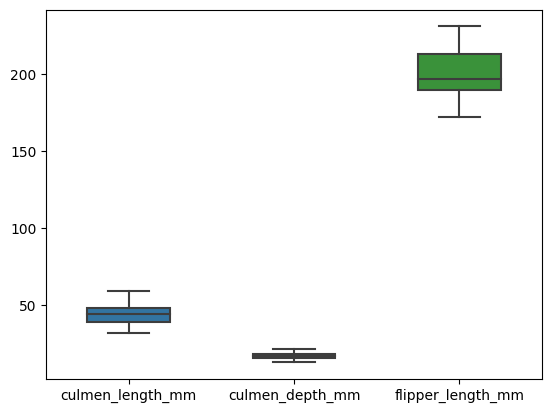

In [16]:
df1 = df[['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm']]
sns.boxplot(data=df1, width=0.5,fliersize=5)

# Scatterplot
The scatter plot which shows us the correlation with respect to other features. This method helps just to figure out the important features which account the most for the classification in our model.

C:\Program Files\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


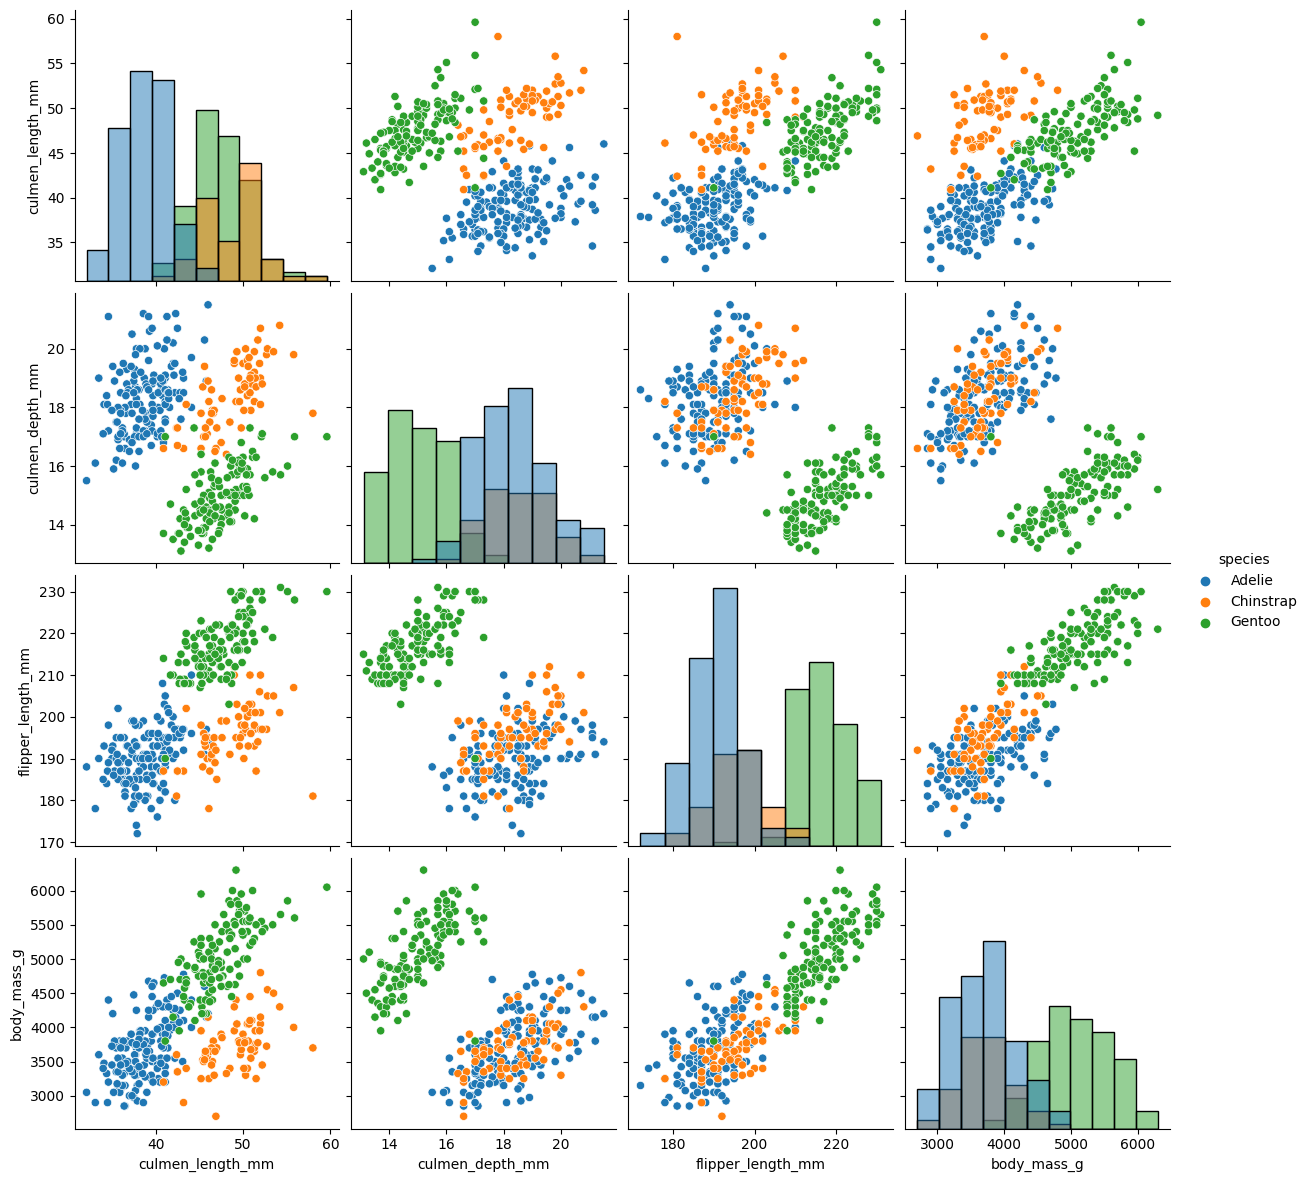

In [17]:
sns.pairplot(df, hue="species", size=3,diag_kind="hist")

## culmen_depth vs culmen_length

In [18]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "culmen_depth_mm") \
   .add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

## culmen_depth vs flipperlength


In [ ]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "culmen_length_mm", "flipper_length_mm") \
   .add_legend()

# Flipperlength distribution

In [ ]:
ax = sns.violinplot(x="species", y="flipper_length_mm", data=df,size=8)


## KDEPlot

In [ ]:
sns.FacetGrid(df, hue="species", size=6,) \
   .map(sns.kdeplot, "flipper_length_mm",shade=True) \
   .add_legend()

## Flipper length vs. body mass


In [19]:
sns.FacetGrid(df, hue="species", size=8) \
   .map(plt.scatter, "body_mass_g", "flipper_length_mm") \
   .add_legend()

TypeError: FacetGrid.__init__() got an unexpected keyword argument 'size'

# UMAP

To use UMAP for this task we need to first construct a UMAP object that will do the job for us

In [20]:
import umap
reducer = umap.UMAP()

ModuleNotFoundError: No module named 'umap'

In [21]:
penguin_data = df[
    [
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

NameError: name 'StandardScaler' is not defined

In [22]:
embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

NameError: name 'reducer' is not defined

In [23]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

NameError: name 'embedding' is not defined